1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

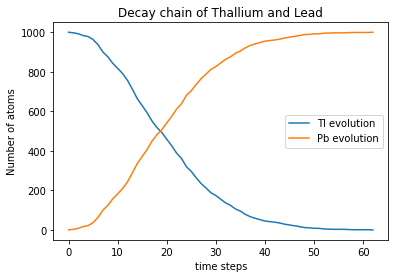

In [ ]:
Tl_samples=[1000]
Leads=[0]

taux=3.052*60

def p(t):
  return 1-2**(-t/taux)

tl_nbr=1000
l_nbr=0
for time_step in range(1,1000):
  prob=np.random.random(size=tl_nbr)
  for i in range(tl_nbr):
    if prob[i]<=p(time_step):
      prob[i]=0
  tl_nbr=tl_nbr-np.sum(prob==0)
  l_nbr+=np.sum(prob==0)
  Tl_samples.append(tl_nbr)
  Leads.append(l_nbr)
  if tl_nbr ==0:
    break

x=np.arange(len(Tl_samples))

plt.plot(x,Tl_samples,label='Tl evolution')
plt.plot(x,Leads,label='Pb evolution')
plt.xlabel('time steps')
plt.ylabel('Number of atoms')
plt.title('Decay chain of Thallium and Lead')
plt.legend()

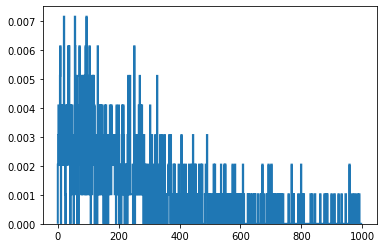

In [ ]:
def p(t):
  return (2**(-t/taux) * np.log(2) ) / taux 

def p_cdf(p):
    return 1-2**(-p/taux)

def p_icdf(p):
    return -(taux/np.log(2))*np.log(1-p)

tl_nbr=1000
x=np.arange(1000)

decay_times  = p_icdf(np.random.random(size=(tl_nbr,))) 
h,bins,_=plt.hist(decay_times, histtype='step', bins=1000, range=(0,1000) ,density=True, linewidth=2)  # plot histogram of the sample v

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

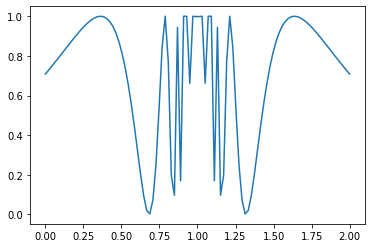

In [ ]:
def f(x):
  return (np.sin(1/(1-x)))**2
  
#plot the function
x=np.linspace(0,2,100)
plt.plot(x,f(x))

In [ ]:
N = 10000
count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): count += 1
I_hit_miss = 2 * count / N
print("Integral with hit/miss method::", I_hit_miss)

Integral with hit/miss method:: 1.341


In [ ]:
N=10000
integrals=[]
for i in range(N):
  count = 0
  for i in range(N):
      x = 2 * np.random.random() # x is random uniform between 0 and 2
      y = np.random.random()     # y is random uniform between 0 and 1
      if y < f(x): count += 1
  I = 2 * count / N
  integrals.append(I)
intagrals=np.array(integrals)
print('Error in hit/miss method:', abs(np.mean(integrals)-I_hit_miss))

Error in hit/miss method: 0.006039980000000167


In [ ]:
total = 0
for i in range(N):
    x = np.random.uniform(0, 2)
    total += f(x)

I_mean = 2 * total / N 
print("Integral with mean method::", I_mean)

Integral with mean method:: 1.3555659032800338


In [ ]:
N=10000
integrals=[]
for i in range(N):
  total = 0
  for i in range(N):
      x = np.random.uniform(0, 2)
      total += f(x)
  I = 2 * total / N
  integrals.append(I)
intagrals=np.array(integrals)
print('Error in mean method:', abs(np.mean(integrals)-I_mean))

Error in mean method: 0.008694939641478161


The two integrals are approximatively the same

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [ ]:
N = 10000
def f(X):
  if (X[0]**2+X[1]**2)<=1:
    return 1
  else:
    return 0
total=0
dim=2
for i in range(N):
    x = np.random.uniform(-1,1,size=(dim))
    total += f(x)

I = 2**dim*total / N 
print('The area of a circle is:',I)

The area of a circle is: 3.1416


In [ ]:
#Generilization
def f(x):
  sum=np.sum([val**2 for val in x])
  if sum<=1:
    return 1
  else:
    return 0

dim=10
total=0
for i in range(N):
    x = np.random.uniform(-1,1,size=(dim))
    total += f(x)

I = 2**(dim)*total / N 
print('The area of a 10D sphere is:',I)

The area of a 10D sphere is: 1.8432


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [ ]:
def f(x):
  return (x**(-1/2)) / (np.exp(x)+1)

def w(x):
  return 1/ np.sqrt(x)

N=100000
x = np.random.uniform(size=(1,N))
Iw=np.sum([w(xi) for xi in x]) /N
If=(1/N)* np.sum([f(xi)/w(xi) for xi in x])*Iw
print('The intagral value is:',If)

The intagral value is: 0.7598327013912476
